In [1]:
import sys
sys.path.append('../../')
from helpers.window import window_input_output

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('../../datasets/Organic.csv')
df.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,3199,6917,8
1,2015-01-11,8856,15071,25
2,2015-01-18,5475,32539,42
3,2015-01-25,4271,8412,585
4,2015-02-01,4824,10710,104


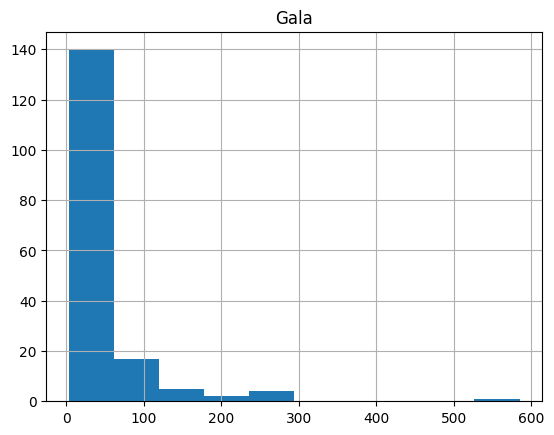

In [4]:
data = df[['Gala']]
data.hist();

## window shift 26 columns

In [5]:
seq_df = window_input_output(26, 26, data)
seq_df

,Gala,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25
51,12,4.0,3.0,33.0,16.0,30.0,29.0,36.0,29.0,36.0,...,46.0,15.0,29.0,13.0,10.0,104.0,585.0,42.0,25.0,8.0
52,52,12.0,4.0,3.0,33.0,16.0,30.0,29.0,36.0,29.0,...,28.0,46.0,15.0,29.0,13.0,10.0,104.0,585.0,42.0,25.0
53,55,52.0,12.0,4.0,3.0,33.0,16.0,30.0,29.0,36.0,...,16.0,28.0,46.0,15.0,29.0,13.0,10.0,104.0,585.0,42.0
54,23,55.0,52.0,12.0,4.0,3.0,33.0,16.0,30.0,29.0,...,9.0,16.0,28.0,46.0,15.0,29.0,13.0,10.0,104.0,585.0
55,30,23.0,55.0,52.0,12.0,4.0,3.0,33.0,16.0,30.0,...,20.0,9.0,16.0,28.0,46.0,15.0,29.0,13.0,10.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,25,50.0,35.0,23.0,36.0,33.0,54.0,22.0,13.0,30.0,...,214.0,97.0,70.0,112.0,76.0,58.0,36.0,24.0,34.0,23.0
165,11,25.0,50.0,35.0,23.0,36.0,33.0,54.0,22.0,13.0,...,139.0,214.0,97.0,70.0,112.0,76.0,58.0,36.0,24.0,34.0
166,52,11.0,25.0,50.0,35.0,23.0,36.0,33.0,54.0,22.0,...,82.0,139.0,214.0,97.0,70.0,112.0,76.0,58.0,36.0,24.0
167,33,52.0,11.0,25.0,50.0,35.0,23.0,36.0,33.0,54.0,...,165.0,82.0,139.0,214.0,97.0,70.0,112.0,76.0,58.0,36.0


## Split data

In [6]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]
X_cols.insert(0, 'Gala')
y_cols = [col for col in seq_df.columns if col.startswith('y')]

X = seq_df[X_cols]
y = seq_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Score

In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Gala):", mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Gala):", mae)

print("R-squared (Test score)", model.score(X_test, y_test))
print("Train score", model.score(X_train, y_train))

Mean Squared Error (Gala): 5748.809419723881
Mean Absolute Error (Gala): 52.772883358187364
R-squared (Test score) -0.804769110451831
Train score 0.23401177670392131


## Visualization

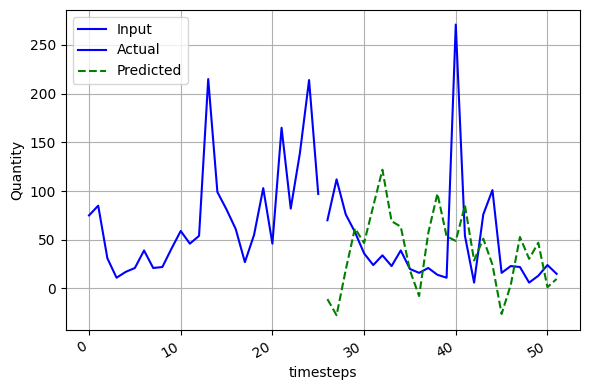

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, 26, 1), X_test.iloc[1, ], 'b-', label='Input')
ax.plot(np.arange(26, 52, 1), y_test.iloc[1, ], color='blue', label='Actual')
ax.plot(np.arange(26, 52, 1), y_pred[1], color='green', label='Predicted', linestyle='--')

ax.set_xlabel('timesteps')
ax.set_ylabel('Quantity')
plt.grid(True)
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

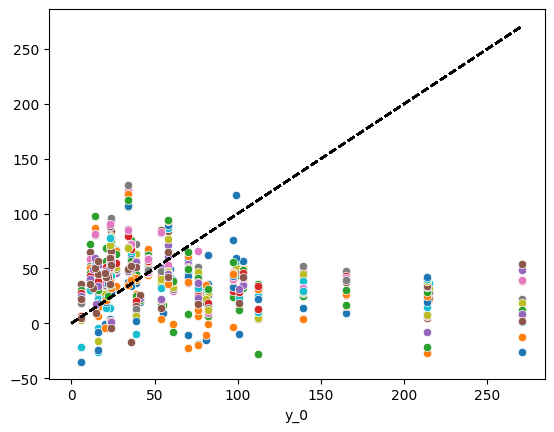

In [10]:
for i, col in enumerate(y_test.columns):
    sns.scatterplot(x=y_test[col], y=y_pred[:, i])

    max_val = max(y_test.max().max(), y_pred.max().max())
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')